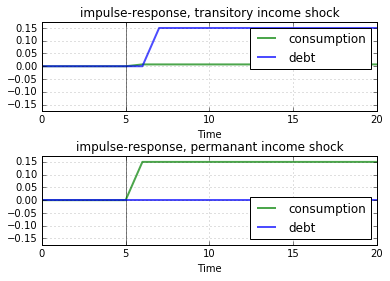

In [1]:
%matplotlib inline
"""
impulse response functions for the LQ permanant income model permanent and
transitory shcoks.
"""

import numpy as np
import matplotlib.pyplot as plt

r=0.05
beta=1/(1+r)
T=20 #time horizon
S=5 #impulse date
sigma1=sigma2=0.15

def time_path(permanent=False):
    "time path of consumption and debt given shock sequence"
    w1=np.zeros(T+1)
    w2=np.zeros(T+1)
    b=np.zeros(T+1)
    c=np.zeros(T+1)
    if permanent:
        w1[S+1]=1.0
    else:
        w2[S+1]=1.0
    for t in range(1, T):
        b[t+1]=b[t]+sigma2*w2[t]
        c[t+1]=c[t]+sigma1*w1[t+1]+(1-beta)*sigma2*w2[t+1]
    return b, c

fig, axes=plt.subplots(2, 1)
plt.subplots_adjust(hspace=0.5)
p_args={'lw':2, 'alpha':0.7}

L=0.175

for ax in axes:
    ax.grid(alpha=0.5)
    ax.set_xlabel(r'Time')
    ax.set_ylim(-L, L)
    ax.plot((S, S), (-L, L), 'k-', lw=0.5)
    
ax=axes[0]
b, c=time_path(permanent=0)
ax.set_title('impulse-response, transitory income shock')
ax.plot(list(range(T+1)), c, 'g-', label="consumption", **p_args)
ax.plot(list(range(T+1)), b, 'b-', label="debt", **p_args)
ax.legend(loc='upper right')

ax=axes[1]
b, c=time_path(permanent=1)
ax.set_title('impulse-response, permanant income shock')
ax.plot(list(range(T+1)), c, 'g-', label="consumption", **p_args)
ax.plot(list(range(T+1)), b, 'b-', label="debt", **p_args)
ax.legend(loc='lower right')
plt.show()